# 푸리에 변환
- 푸리에 변환이란 시계열 데이터를 sin, cos함수들과 같은 파형들로 나타내며 여러 개의 주파수 성분으로 분해하는 방법론입니다. 주로 주기성을 가지는 센서 시계열 데이터, 음향 데이터, 신호 처리 데이터 등에서 많이 사용됩니다.

![FFT](img/FFT.jpg)

- reference : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kalsanja&logNo=221141310946

### 고속 푸리에 변환, FFT(Fast Fourier Transform)

- FFT는 이산 푸리에 변환과 그 역변환을 빠르게 수행하는 알고리즘입니다.
- Python을 사용하여 FFT를 이용해 시계열 데이터를 분해하여 어떤 주파수로 구성되어 있는지 살펴봅니다.
- 그리고, 분해된 주파수들 중 이상 탐지에 필요한 주파수들만 재결합하여 노이즈를 제거할 수 있습니다.

##### 파라미터 소개


- Sampling Rate(fs): 1초간 수집하는 (평균)샘플 수


- Blocklength(BL) : 1초간 수집된 샘플을 토대로 선정된 샘플 수, 단, 항상 2의 배수 값을 선택해야 함


- Bandwidth (Fn)_Nyquist Frequency : FFT 변환에 의해 결정되는 이론적인 (측정 가능한) 최대 주파수, fn = fs/2


- Measurement Duaration(D): Sampling rate(fs)와 Blocklength(BL)에 의해 산정, D = BL/fs

### Sample Data

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

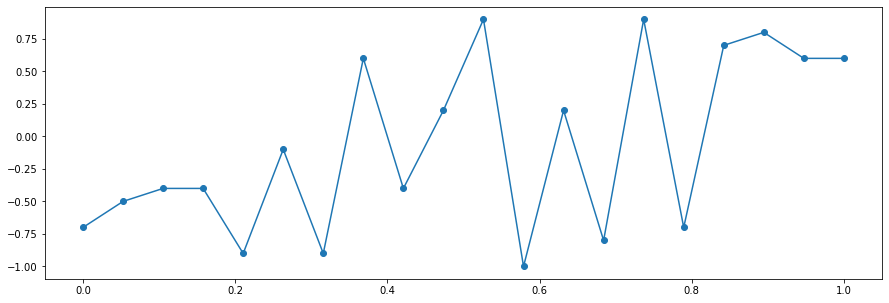

In [2]:
# 0에서 1까지 사이의 20개 점을 찍음
n = 20
x = np.linspace(0, 1, n)
y = np.array([i/10 for i in np.random.randint(-10, 10, n)])

# plot
plt.figure(figsize=(15, 5))
plt.plot(x, y, marker='o')
plt.show()

### 보간법 (interpolation)
- 필요한 샘플링 주기(dt)는 최대 주파수 설정에 따라 변함
- FFT 변환에 의해 측정 가능한 최대 주파수를 500Hz로 성분 분석을 하려면 평균 샘플링 주기(fs)를 1000Hz로 설정
- 이때, 샘플링 주기(dt)는 1/1000 sec 로 설정되며 일정한 시간간격(1ms)마다의 신호값을 스플라인 곡선 추청으로 대체하여 그래프를 그림

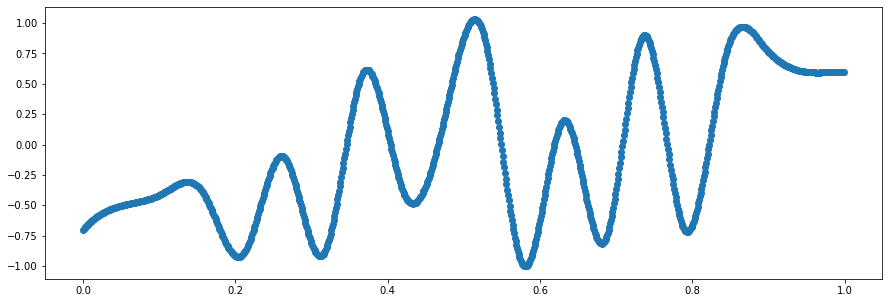

In [16]:
# 3차 스플라인 곡선으로 추정
# 몇 개의 샘플 포인트들로 추정하여 인접한 점들 사이를 다항식 함수로 완만한 곡선으로 이어준 것을

fs = 1000
dt = 1/fs

# x, y (샘플)값을 주고 추정하는 스플라인 곡선을 만든다.
spl = splrep(x, y)

# 0~100까지 샘플링 주기로 해당 구간에 대한 모든 점들을 위 스플라인 곡선으로 추정한 y값을 구한다.
x1 = np.arange(0, 1, dt)
y1 = splev(x1, spl)

newt = np.arange(0, 1, dt) 
newx = splev(newt, spl) 

# plot
plt.figure(figsize=(15, 5))
plt.plot(x1, y1, marker='o')
plt.show()

### FFT(Fast Fourier Transform)
- 위에서 새롭게 보간해서 만든 데이터를 분해합니다.먼저 어떤 스펙트럼을 구해서 주파수를 사용해야 하는지를 살펴봅니다.스펙트럼 그래프에서 높은 값을 가진 성분의 주파수를 선택하면 됩니다.

In [6]:
# 주파수 생성 
# nfft = 샘플 개수
nfft = len(x1) 
# df = 주파수 증가량
df = fs/nfft 
k = np.arange(nfft) 
# f = 0부터~최대주파수까지의 범위
f = k*df 

# 스펙트럼은 중앙을 기준으로 대칭이 되기 때문에 절반만 구함
nfft_half = math.trunc(nfft/2)
f0 = f[range(nfft_half)] 
# 증폭값을 두 배로 계산(위에서 1/2 계산으로 인해 에너지가 반으로 줄었기 때문)
fft_y = np.fft.fft(y1)/nfft * 2 
fft_y0 = fft_y[range(nfft_half)]
# 벡터(복소수)의 norm 측정(신호 강도)
amp = abs(fft_y0)

가로축은 주파수 이며 세로축은 신호 강도입니다.
강도가 센 상위 몇개의 주파수만 선별해서 살펴보면 됩니다.

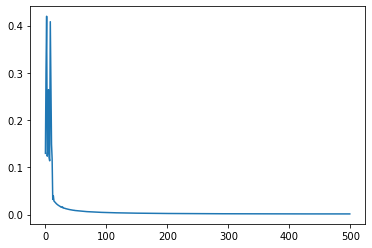

In [7]:
if True:  
    plt.figure()  
    plt.plot(f0, amp)
    plt.show()

In [8]:
# 상위 10개의 주파수
idxy = np.argsort(-amp)  
for i in range(10):  
    print('freq=', f0[idxy[i]], 'amp=', fft_y[idxy[i]])

freq= 2.0 amp= (0.21098222064335556+0.36285072030972104j)
freq= 8.0 amp= (0.40621615316657683+0.040365248243140674j)
freq= 1.0 amp= (0.039234575832614374+0.3018580048155407j)
freq= 9.0 amp= (-0.22064397316406412+0.15134432407435203j)
freq= 5.0 amp= (-0.21786253198773733+0.1492018877387327j)
freq= 10.0 amp= (-0.14591812414803648-0.030008562336450224j)
freq= 4.0 amp= (0.010899235220062187+0.13482446917952842j)
freq= 0.0 amp= (-0.1294933051955195+0j)
freq= 3.0 amp= (-0.10292740881008132+0.06833975518631508j)
freq= 6.0 amp= (0.021068791047164-0.11915494230011173j)


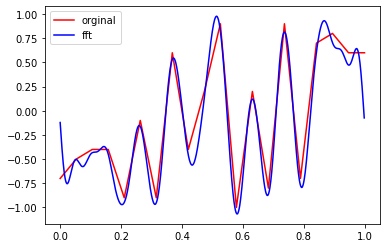

In [9]:
# 상위 20개의 주파수로 복원해서 원본이랑 비교해보기
# 20개의 주파수만 더해도 어느정도 복원된것을 확인할 수 있음
newy = np.zeros((nfft,)) 
arfreq = [] 
arcoec = [] 
arcoes = [] 

for i in range(20): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * x1) + coes * np.sin(2 * np.pi * freq * x1) 
    arfreq.append(freq) 
    arcoec.append(coec) 
    arcoes.append(coes)

plt.figure() 
plt.plot(x, y, c='r', label='orginal') 
plt.plot(x1, newy, c='b', label='fft') 
plt.legend() 
plt.show()

상위 주파수를 하나씩 더해가면서 변하는 모습을 살펴봅니다.

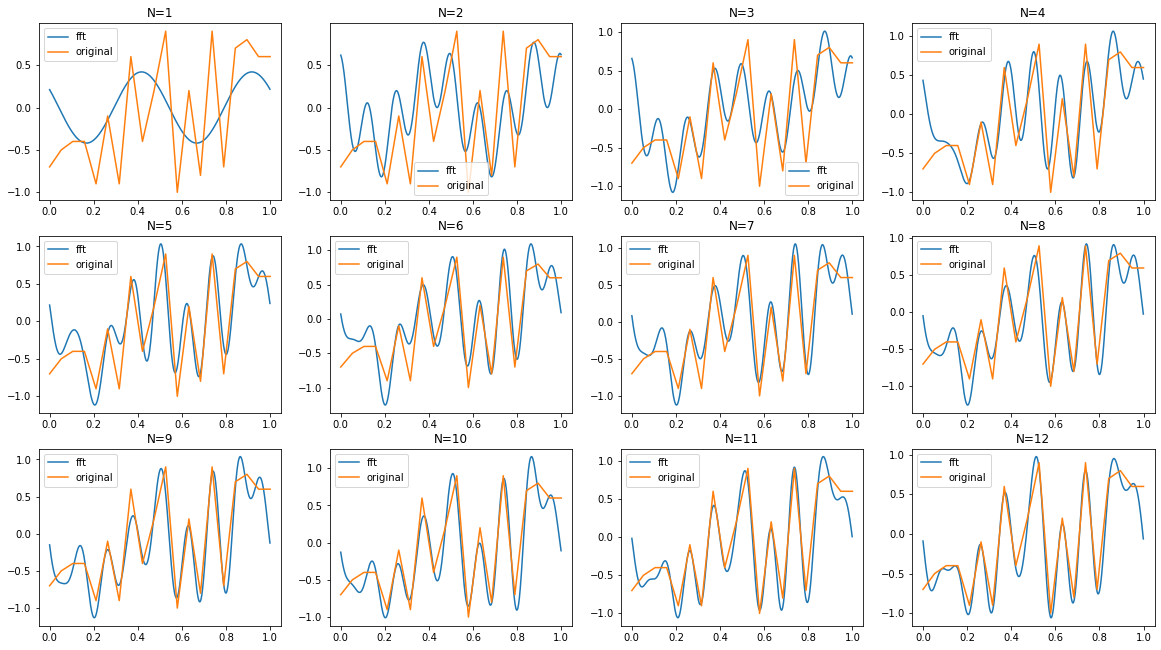

In [17]:
plt.figure(figsize=(20,15)) 
plti = 0 
ncnt = 11
newy = np.zeros((nfft,)) 

for i in range(ncnt+1): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * newt) + coes * np.sin(2 * np.pi * freq * newt) 
    
    plti+=1 
    plt.subplot(4,4, plti) 
    plt.title("N={}".format(i+1)) 
    plt.plot(x1, newy, label='fft')
    plt.plot(x, y, label='original')
    plt.legend()